In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf


In [28]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("d:\gli\dse\data\car-mpg.csv")  

pd.isnull(df).count()

mpg         398
cyl         398
disp        398
hp          398
wt          398
acc         398
yr          398
origin      398
car_type    398
car_name    398
dtype: int64

In [34]:
df  = df.drop("car_name" , axis=1)

In [35]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [36]:
temp  = pd.DataFrame(df.hp.str.isdigit()) 
temp[temp['hp'] == False] 

,hp


In [37]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
df = df.replace('?', np.nan)

In [38]:
# Since the question marks appear only in the "hp" columns, replace them with the median of the same column
df = df.apply(lambda x: x.fillna(x.median()),axis=0)


In [39]:
# While reading the data into dataframe, Pandas assigned the data type as object to column "hp" because of the question marks
# The column type continues to be same even after replacing the question marks with the median
# Convert the column type to float64


df['hp'] = df['hp'].astype('float64')  # converting the hp column from object / string type to float

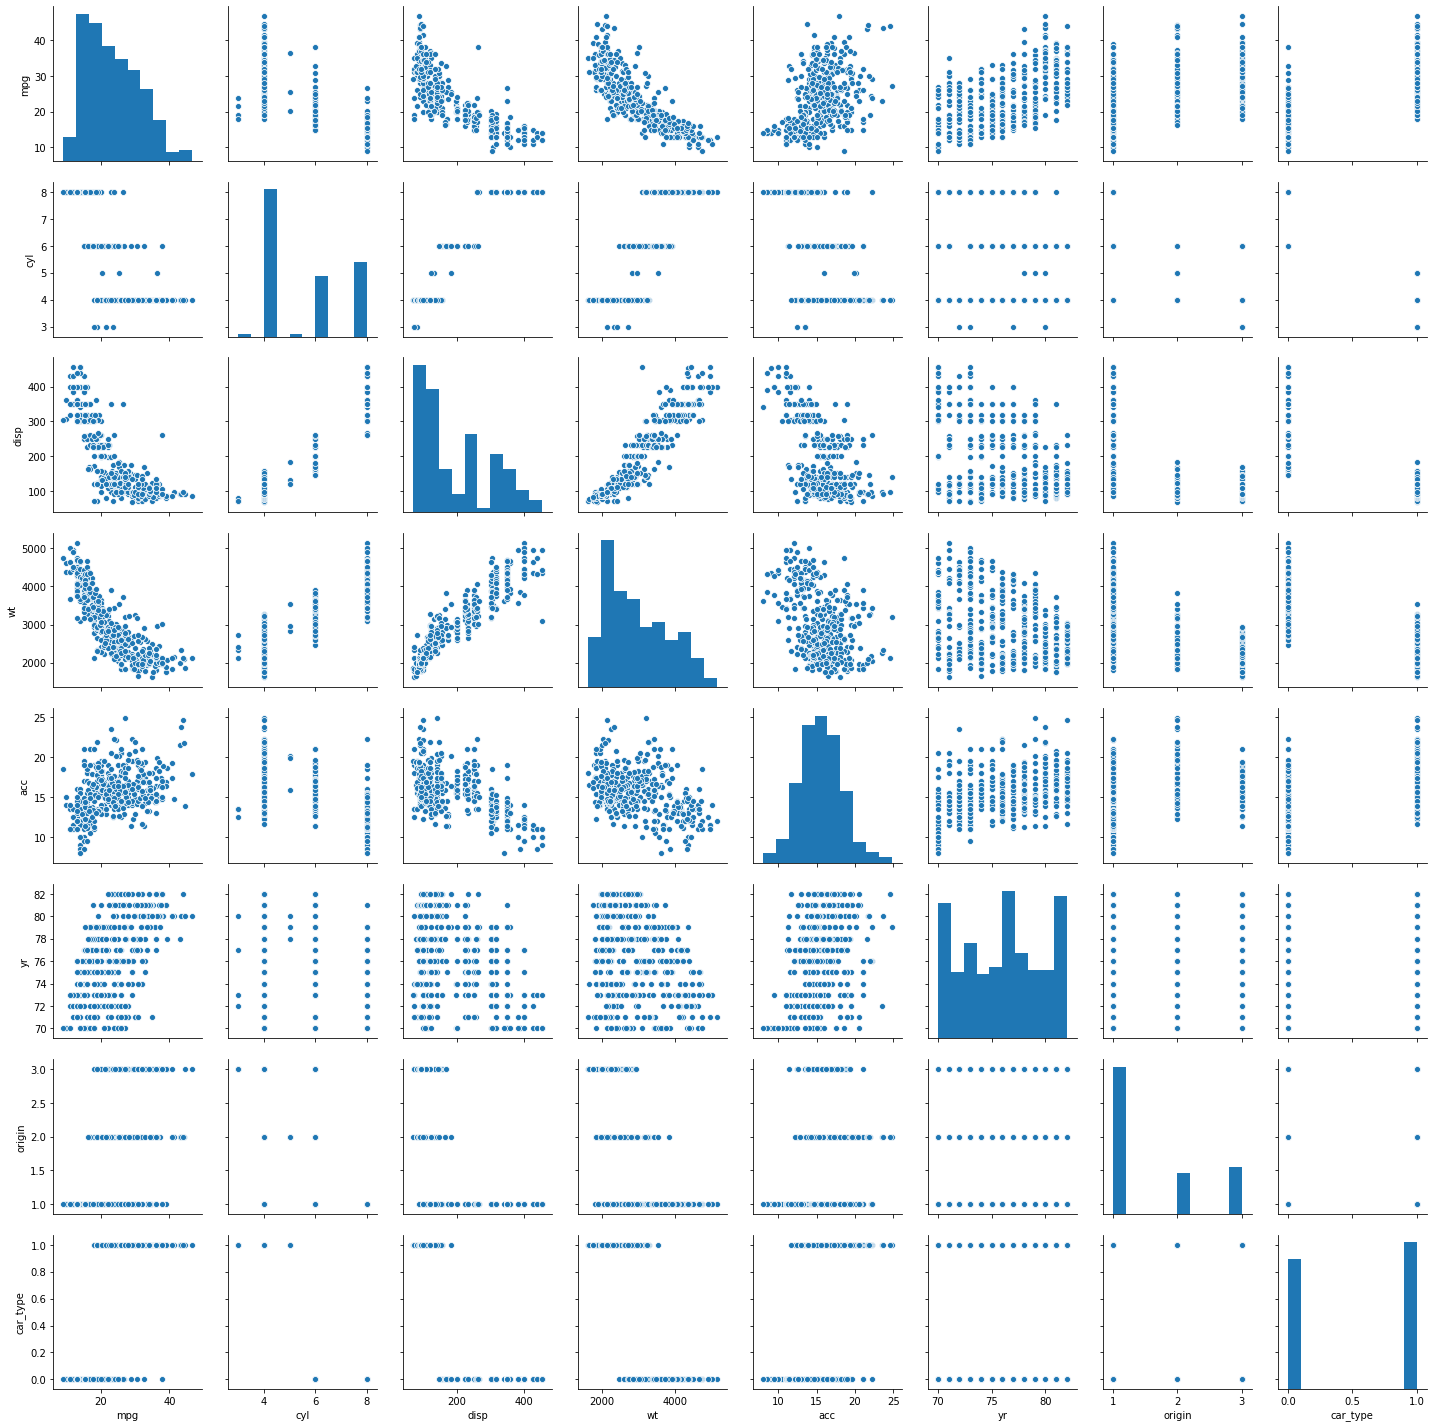

In [3]:
import seaborn as sns

sns.pairplot(data=df)



In [43]:
# convert origin to numric values (but that will introduce an order in that column)


df['Origin'] = df['origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [44]:
# convert the numeric values to one-hot code to remove the order

df = pd.get_dummies(df, columns=['origin'])

In [47]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,Origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,USA,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,USA,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,USA,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,USA,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,USA,1,0,0


In [45]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=df.iloc[:,1:8]

# Specify the target labels and flatten array
y= df.mpg


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [46]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Deep Neural Network

In [187]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
#model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))





In [188]:
optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])
                   

epochs = 50


In [189]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#print(hist)




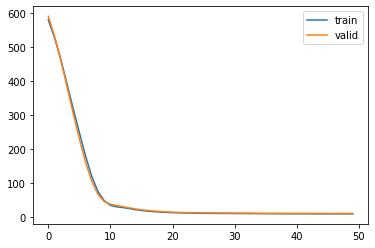

In [190]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)


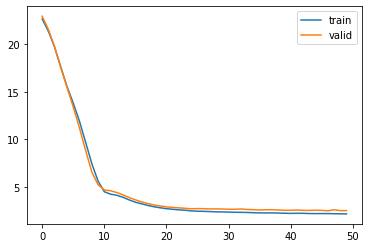

In [191]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [192]:

loss = model.evaluate(X_test, y_test, verbose=False)

In [193]:
y_pred = np.round(model.predict(X_test))

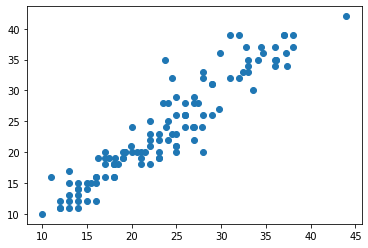

In [194]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)